# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.cluster import KMeans   #Making Cluster

# Load & Exploring data

In [3]:
data=pd.read_csv("Mall_Customers.csv")

In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
print(f'have any messing vlues ? \n{data.isna().values.any()}')

have any messing vlues ? 
False


In [9]:
print(f'have any duplicated vlues ? \n{data.duplicated().values.any()}')

have any duplicated vlues ? 
False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
x=data.iloc[: ,[-1,-2]].values

In [15]:
print(x)

[[ 39  15]
 [ 81  15]
 [  6  16]
 [ 77  16]
 [ 40  17]
 [ 76  17]
 [  6  18]
 [ 94  18]
 [  3  19]
 [ 72  19]
 [ 14  19]
 [ 99  19]
 [ 15  20]
 [ 77  20]
 [ 13  20]
 [ 79  20]
 [ 35  21]
 [ 66  21]
 [ 29  23]
 [ 98  23]
 [ 35  24]
 [ 73  24]
 [  5  25]
 [ 73  25]
 [ 14  28]
 [ 82  28]
 [ 32  28]
 [ 61  28]
 [ 31  29]
 [ 87  29]
 [  4  30]
 [ 73  30]
 [  4  33]
 [ 92  33]
 [ 14  33]
 [ 81  33]
 [ 17  34]
 [ 73  34]
 [ 26  37]
 [ 75  37]
 [ 35  38]
 [ 92  38]
 [ 36  39]
 [ 61  39]
 [ 28  39]
 [ 65  39]
 [ 55  40]
 [ 47  40]
 [ 42  40]
 [ 42  40]
 [ 52  42]
 [ 60  42]
 [ 54  43]
 [ 60  43]
 [ 45  43]
 [ 41  43]
 [ 50  44]
 [ 46  44]
 [ 51  46]
 [ 46  46]
 [ 56  46]
 [ 55  46]
 [ 52  47]
 [ 59  47]
 [ 51  48]
 [ 59  48]
 [ 50  48]
 [ 48  48]
 [ 59  48]
 [ 47  48]
 [ 55  49]
 [ 42  49]
 [ 49  50]
 [ 56  50]
 [ 47  54]
 [ 54  54]
 [ 53  54]
 [ 48  54]
 [ 52  54]
 [ 42  54]
 [ 51  54]
 [ 55  54]
 [ 41  54]
 [ 44  54]
 [ 57  54]
 [ 46  54]
 [ 58  57]
 [ 55  57]
 [ 60  58]
 [ 46  58]
 [ 55  59]

# WCSS ->Within Cluster Sum of Square

To Knowing the best number of clusters

In [16]:
wcss = []

for i in range(1,10):
    kmeans_model = KMeans(n_clusters=i , init='k-means++') # Creating cluster model
    kmeans_model.fit(x) # fitting data and making the clusters
    
    
    wcss.append(kmeans_model.inertia_) # save the distance in the list

C:\Users\motal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\motal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\motal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\motal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [20]:
print(f'The distcnce for each cluster: \n {wcss}')

The distcnce for each cluster: 
 [269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37271.8862365895, 30259.65720728547, 25031.418952745145, 21862.092672182887]


# Visualize the relation between  clusters with distances

# Elbow Method

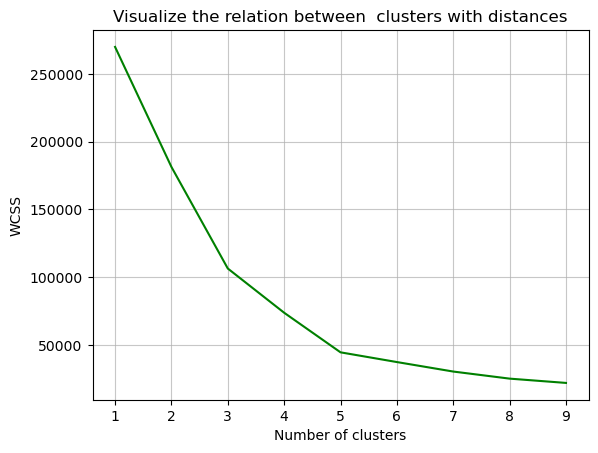

In [24]:
plt.plot(range(1,10) , wcss , color='g')
plt.title("Visualize the relation between  clusters with distances")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(alpha=0.7)
plt.show()

Best Number of clusters are {3,5}

# Training Model

with 3 clusters

In [25]:
KMeans_model = KMeans(n_clusters=3 , init="k-means++")

# Return a labels of data
y = KMeans_model.fit_predict(x)
print(y)

C:\Users\motal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\motal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


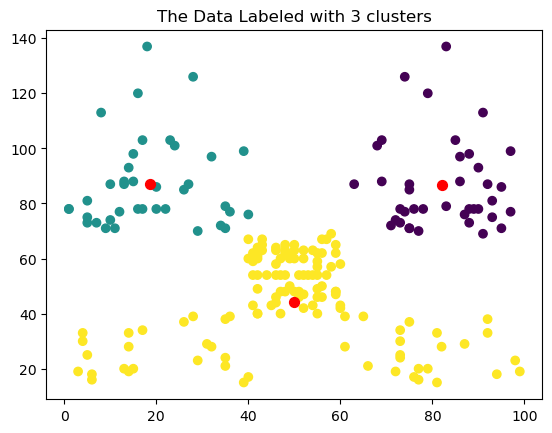

In [35]:
plt.scatter(x[: ,0] , x[: ,1] , c=KMeans_model.labels_)
plt.scatter(KMeans_model.cluster_centers_[: , 0] ,KMeans_model.cluster_centers_[: , 1]  , s=50 , c='r')
plt.title("The Data Labeled with 3 clusters")
plt.show()

# Using 5 Clusters

In [32]:
KMeans_model2 = KMeans(n_clusters=5 , init="k-means++")

# Return a labels of data
y = KMeans_model2.fit_predict(x)
print(y)

C:\Users\motal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\motal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


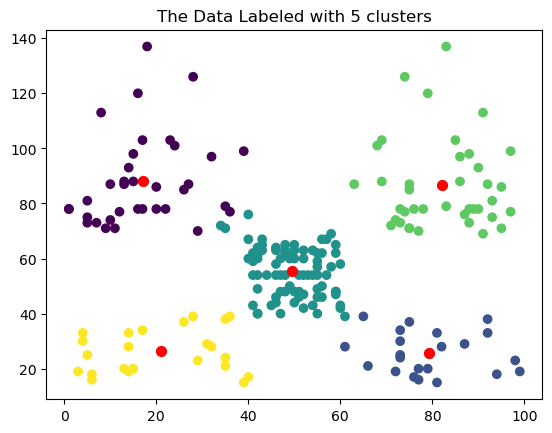

In [34]:
plt.scatter(x[: ,0] , x[: ,1] , c=KMeans_model2.labels_)
plt.scatter(KMeans_model2.cluster_centers_[: , 0] ,KMeans_model2.cluster_centers_[: , 1]  , s=50 , c='r')
plt.title("The Data Labeled with 5 clusters")
plt.show()

----------------------------------------------------------------------------------------------------